# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تنظیم روشنایی و کنتراست(با توابع خطی)</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در نوت‌بوک قبلی عملیات ریاضی روی تصویر و تاثیر جمع و تفریق کردن یک مقدار روی تصویر را روی نور یا brightness را مشاهده کردید.
</div>

[08-Arithmetic-Operations.ipynb](https://nbviewer.org/github/Alireza-Akhavan/class.vision/blob/master/08-Arithmetic-Operations.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
حال علاوه بر روشنایی (brightness)، تضاد تصویر یا کنتراست(contrast) را بررسی خواهیم کرد و مشکلات این روش خطی بیان خواهد شد!</div>

$$g(x) = \alpha f(x) + \beta$$
$$\alpha > 0$$

The parameters α and β are often called the gain and bias parameters.
sometimes these parameters are said to control contrast and brightness respectively.

### do it with `convertScaleAbs()` function

* Enter the alpha value [0.1-3.0]:  1.5
* Enter the beta value [0-100]:  0


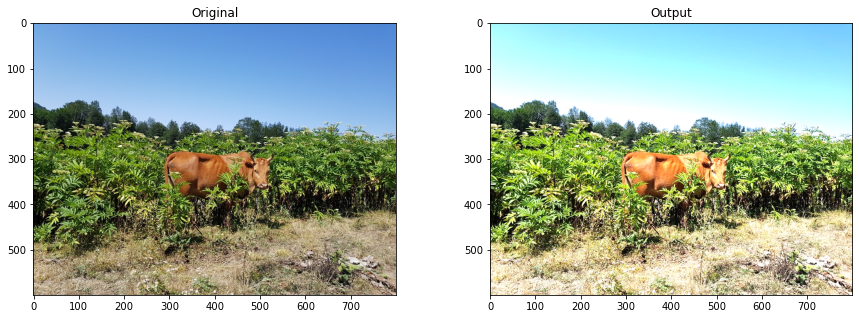

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/input.jpg")

new_image = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

            
plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("Output");



<div style="direction:rtl;text-align:right;font-family:Tahoma">
قاعدتاً این عملیات را میتوانیم روی تک تک پیکسل ها یا سطر و ستون ها فرض کنیم که با فرض i شماره سطر و j شماره تون خواهیم داشت:</div>

$$g(i,j) = \alpha \cdot f(i,j) + \beta$$

* Enter the alpha value [0.1-3.0]:  0.5
* Enter the beta value [0-100]:  100


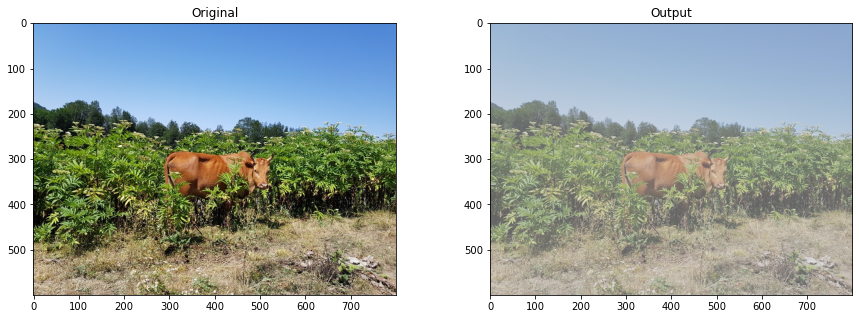

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/input.jpg")

new_image2 = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image2[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

            
plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image2[...,::-1]);plt.title("Output");



# Histogram analysis

In [27]:
gray_image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
gray_new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

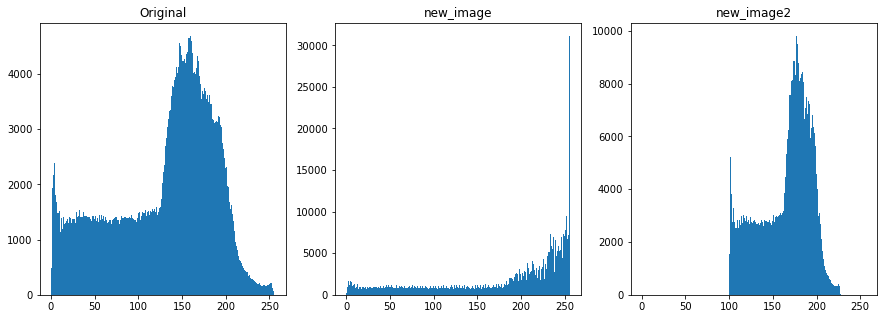

In [28]:
plt.figure(figsize=[15,5])
plt.subplot(131);plt.hist(gray_image.ravel(),256,[0,256]);plt.title("Original");
plt.subplot(132);plt.hist(gray_new_image.ravel(),256,[0,256]);plt.title("new_image");
plt.subplot(133);plt.hist(gray_new_image2.ravel(),256,[0,256]);plt.title("new_image2");


Let's solve this problem in the [next notebook, 10-Gamma-correction.ipynb](https://nbviewer.org/github/Alireza-Akhavan/class.vision/blob/master/10-Gamma-correction.ipynb)

Source: https://docs.opencv.org/4.6.0/d3/dc1/tutorial_basic_linear_transform.html